In [120]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd 
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [222]:
## importing the data
df = pd.read_csv("titanic_data.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Who were the passengers on the Titanic? (Ages, Gender, Class..)


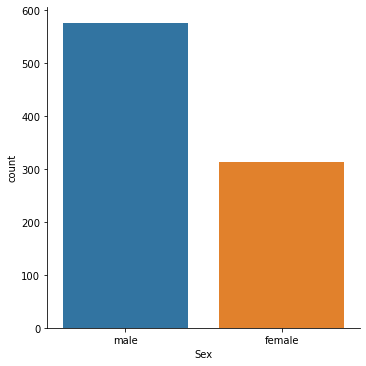

In [121]:
sns.catplot("Sex", data = df, kind="count")

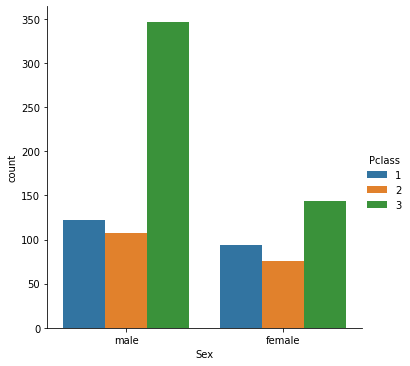

In [122]:
sns.catplot("Sex", data = df, hue = "Pclass", kind = "count")

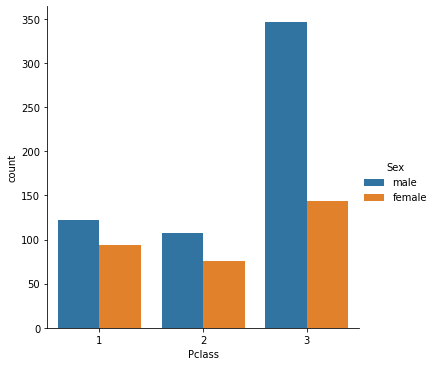

In [123]:
sns.catplot("Pclass", data = df, hue = "Sex", kind = "count")

In [36]:
def male_female_child(pasg):
     age,sex = pasg
     if age < 18:
        return "child"
     else:
        return sex

In [232]:
df["Person"] = df[["Age","Sex"]].apply(male_female_child, axis = 1)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


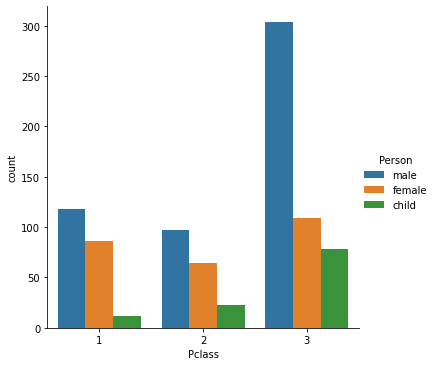

In [124]:
sns.factorplot("Pclass", data = df, hue = "Person", kind = "count")

In [ ]:
## Age Distribution

<AxesSubplot:>

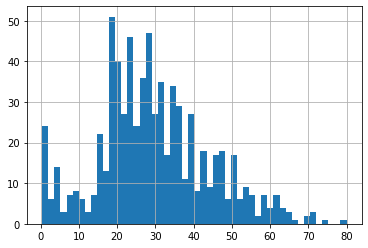

In [46]:
df["Age"].hist(bins= 50)

In [70]:
df["Age"].mean()

29.69911764705882

In [84]:
df["Person"].value_counts()

male      519
female    259
child     113
Name: Person, dtype: int64

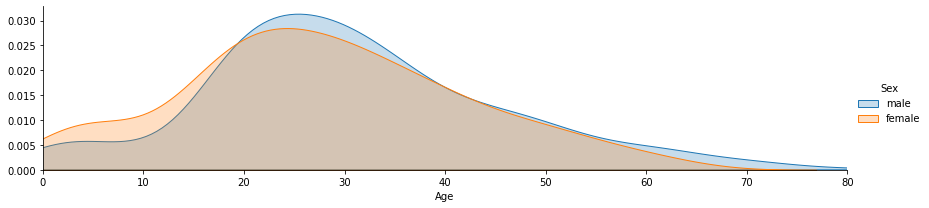

In [89]:
fig = sns.FacetGrid(df, hue = "Sex", aspect=4)
fig.map(sns.kdeplot, "Age", shade = True)

oldest = df["Age"].max()
fig.set(xlim = (0,oldest))
fig.add_legend()

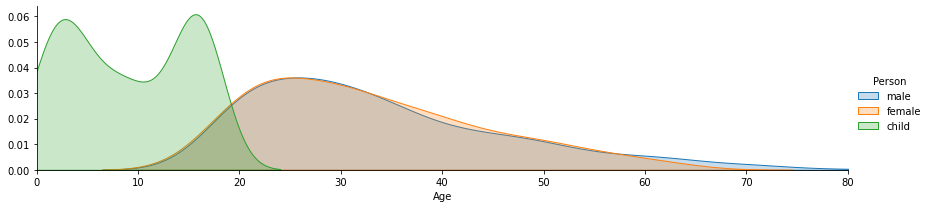

In [91]:
fig = sns.FacetGrid(df, hue = "Person", aspect=4)
fig.map(sns.kdeplot, "Age", shade = True)

oldest = df["Age"].max()
fig.set(xlim = (0,oldest))
fig.add_legend()

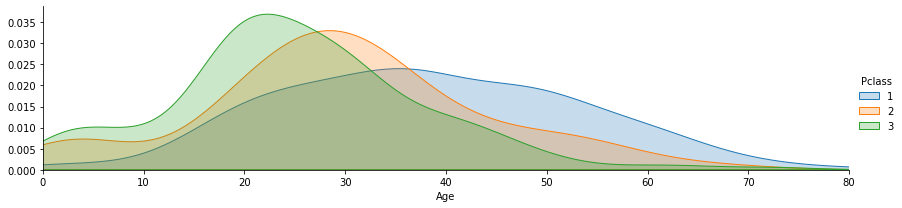

In [93]:
fig = sns.FacetGrid(df, hue = "Pclass", aspect=4)
fig.map(sns.kdeplot, "Age", shade = True)

oldest = df["Age"].max()
fig.set(xlim = (0,oldest))
fig.add_legend()

What deck were the passangers on and is there any relation between their class deck?

In [95]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [97]:
deck = df["Cabin"].dropna()

In [99]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [111]:
levels = deck.str.slice(stop = 1)
levels.head()

1     C
3     C
6     E
10    G
11    C
Name: Cabin, dtype: object

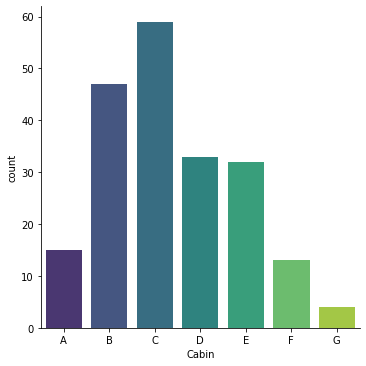

In [130]:
cabin_df = DataFrame(levels)
cabin_df.columns = ["Cabin"]
cabin_df = cabin_df[cabin_df.Cabin != "T"]
sns.catplot("Cabin", data = cabin_df, kind="count", palette = "viridis", order=["A", "B","C","D","E","F","G"])

Where did the passengers come from?

In [223]:
df2 = df.copy()


df2["Embarked"] = df2["Embarked"].map({
                                       "S": "Southampton",
                                       "Q": "Queenstown",
                                       "C": "Cherbourg"
                                       })

In [224]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,Southampton
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,Southampton
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,Southampton
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,Cherbourg


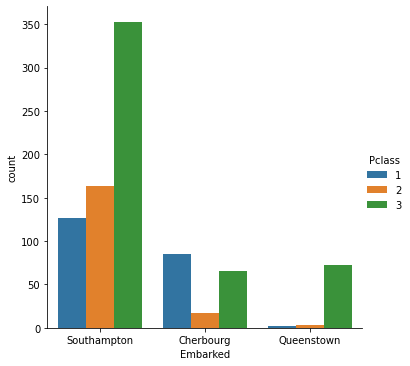

In [225]:
sns.catplot("Embarked", data = df2, hue = "Pclass", kind="count")

Who was alone and who was with family?

In [176]:
df["Alone"] = df["SibSp"] + df["Parch"]

In [166]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [177]:
df["Alone"].loc[df["Alone"] > 0 ] = "Not alone"                             
df["Alone"].loc[df["Alone"] == 0 ] = "Alone"       

In [178]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Not alone
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Not alone
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Not alone
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Alone


Text(0.5, 6.79999999999999, 'Is alone?')

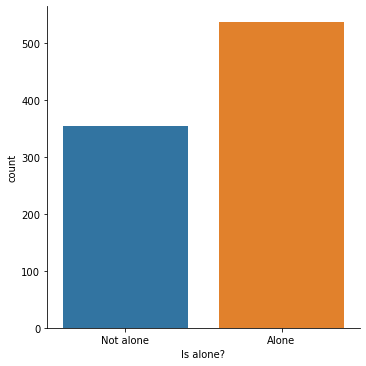

In [183]:
sns.catplot("Alone", data=df, kind="count")
plt.xlabel("Is alone?")

In [184]:
df["Survivor"] = df["Survived"].map({0:"no", 1:"yes"})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Not alone,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Not alone,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Not alone,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Alone,no


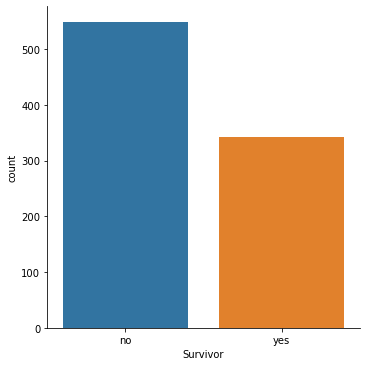

In [185]:
sns.catplot("Survivor", data=df, kind="count")

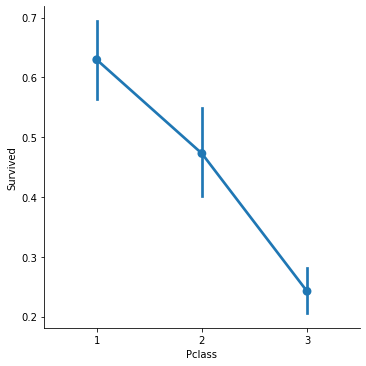

In [228]:
sns.factorplot("Pclass","Survived", data=df)

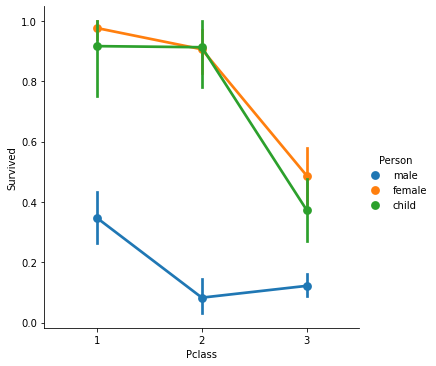

In [234]:
sns.factorplot("Pclass","Survived", data=df, hue="Person")

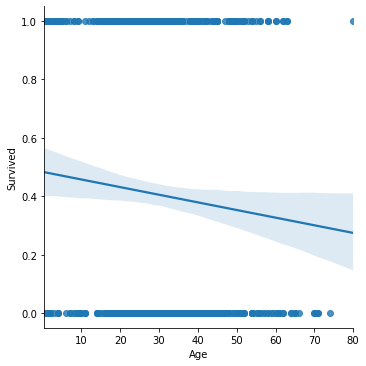

In [237]:
sns.lmplot("Age", "Survived", data = df)

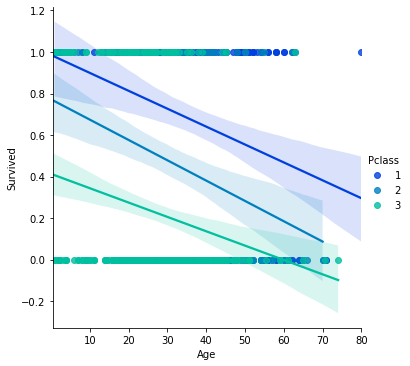

In [239]:
sns.lmplot("Age", "Survived", data = df, hue = "Pclass", palette="winter")